<a href="https://colab.research.google.com/github/ZeeMurphy/Projects-Z/blob/main/Porject1_201April10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **An Exploratory Data Analysis of Police Shootings in the United States (2015–2024)**

![Police Data Visualization]

Zivar S Murphy    
Professor Abdirisak Mohamed   
Data 201   
April 10, 2025Z

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

For this project, the dataset is sourced from an analysis conducted by The Washington Post on police shootings in the United States. According to their research, police in the U.S. shoot and kill over 1,000 people every year on average. The dataset includes key details about these incidents, covering the period from January 2, 2015, to December 31, 2024.    
The dataset contains 10,429 rows and provides detailed information that can be analyzed to explore patterns and trends in police shootings across the country. Some questions I am interested in include:


*  What is the relationship between race and the likelihood of being shot by police?
*   How does age or gender impact the likelihood of a fatal police encounter?
*  What role does mental illness play in these incidents?
*  Does the presence of body cameras affect the outcome of police encounters?


In [102]:
df = pd.read_csv('/content/2024-07-23-washington-post-police-shootings-export.csv')
df.head(5)

,date,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
0,2015-01-02,Lewis Lee Lembke,47.0,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR"
1,2015-01-02,Tim Elliot,53.0,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA"
2,2015-01-03,John Paul Quintero,23.0,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS"
3,2015-01-04,Kenneth Joe Brown,18.0,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK"
4,2015-01-04,Michael Rodriguez,39.0,male,other,Hispanic,Evans,CO,not,False,False,"Evans Police Department, CO"


In [103]:
df.describe()

,age
count,9509.000000
mean,37.409507
std,12.932616
min,2.000000
25%,28.000000
50%,35.000000
75%,45.000000
max,92.000000


In [127]:
df['age'].median()

35.0

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         9893 non-null   object 
 1   name                         9556 non-null   object 
 2   age                          9509 non-null   float64
 3   gender                       9865 non-null   object 
 4   armed                        9682 non-null   object 
 5   race                         9893 non-null   object 
 6   city                         9821 non-null   object 
 7   state                        9893 non-null   object 
 8   flee                         8548 non-null   object 
 9   body_camera                  9893 non-null   bool   
 10  signs_of_mental_illness      9893 non-null   bool   
 11  police_departments_involved  9892 non-null   object 
dtypes: bool(2), float64(1), object(9)
memory usage: 792.3+ KB


In [129]:
df.shape

(7952, 14)

In [106]:
df.isnull().sum()

,0
date,0
name,337
age,384
gender,28
armed,211
race,0
city,72
state,0
flee,1345
body_camera,0


In [107]:
df = df.dropna()

In [131]:
df['date'] = pd.to_datetime(df['date'])

In [109]:
print(df.columns)

Index(['date', 'name', 'age', 'gender', 'armed', 'race', 'city', 'state',
       'flee', 'body_camera', 'signs_of_mental_illness',
       'police_departments_involved'],
      dtype='object')


Extracting the year from the 'date' column and Checking the first few rows to ensure the 'year' column was created correctl

In [110]:
df['year'] = df['date'].dt.year

print(df[['date', 'year']].head())


        date  year
0 2015-01-02  2015
1 2015-01-02  2015
2 2015-01-03  2015
3 2015-01-04  2015
4 2015-01-04  2015


<ipython-input-110-8bc56cf6cdfc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year


In [111]:
print(df.duplicated().sum())

0


removing $, %, commas, and replace empty or invalid cells with NaN

In [112]:
def clean_all_columns(col):
    return col.replace({'\$': '', ',': '', '%': '', '': np.nan, 'NaN': np.nan}, regex=True)
df = df.apply(clean_all_columns)

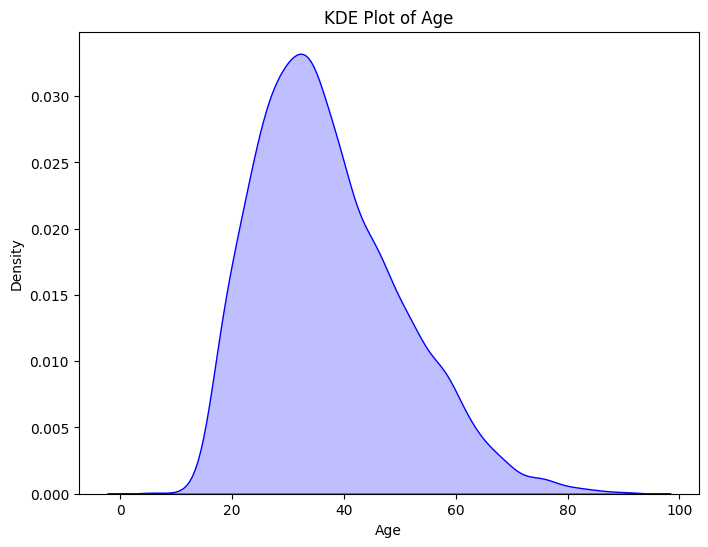

In [113]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['age'], color='blue', fill=True, linewidth=1)
plt.title('KDE Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

Plotting the count of individuals by race

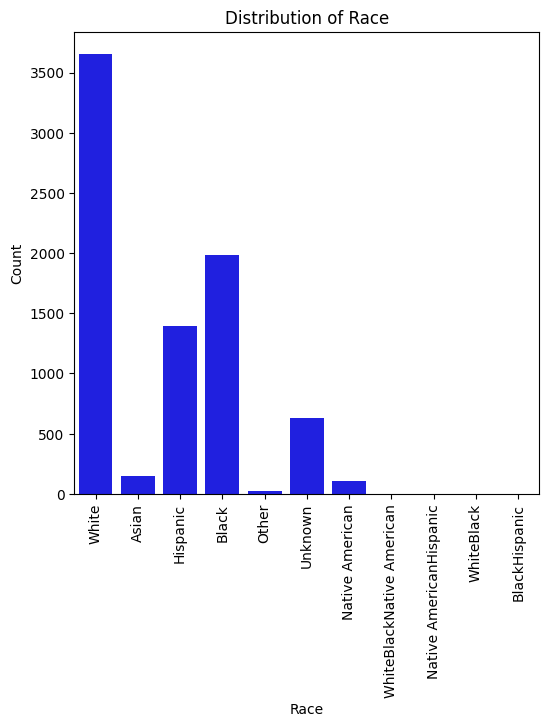

In [114]:
plt.figure(figsize=(6, 6))
sns.countplot(x='race', data=df, color='blue')
plt.title('Distribution of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Although half of the people shot and killed by police are White, Black Americans are shot at a disproportionate rate.

Grouping by year and count the number of shootings

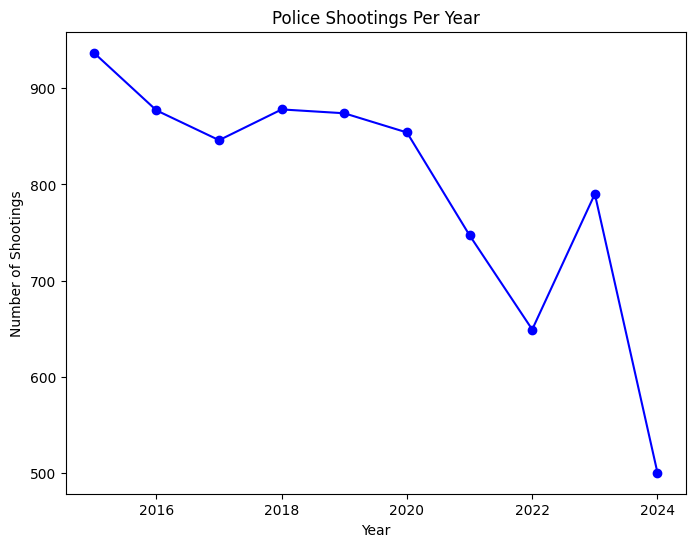

In [115]:
shootings_per_year = df.groupby('year').size()
plt.figure(figsize=(8, 6))
shootings_per_year.plot(kind='line', marker='o', color='blue')
plt.title('Police Shootings Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Shootings')
plt.grid(False)
plt.show()


Combining city and state into one column for clarity and checking for the cities with the highest number of shootings.

<ipython-input-116-f1bf77b526f1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities_df, y='City_State', x='Count', palette='coolwarm', hue=None)  # Explicitly setting hue=None


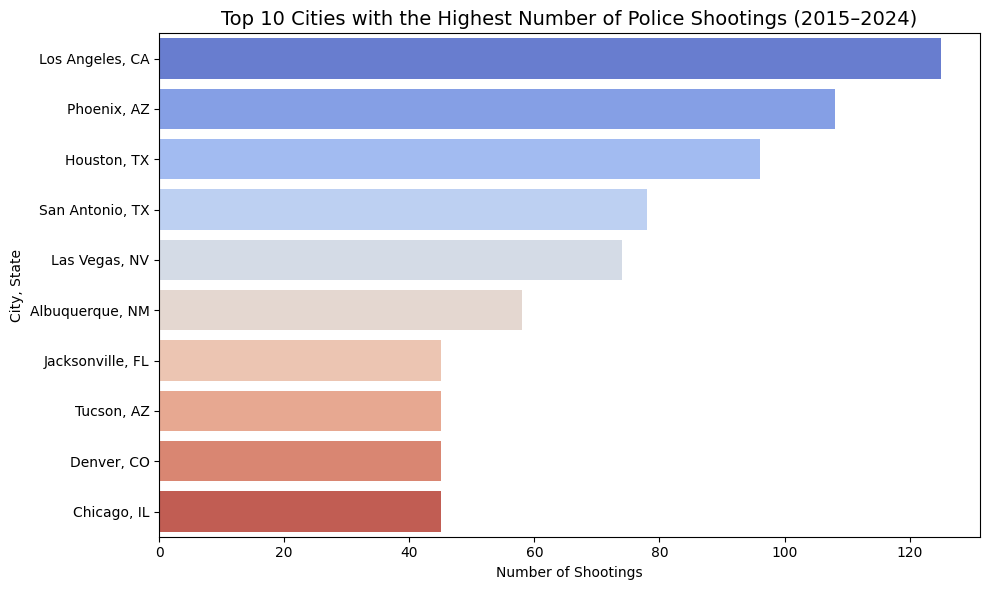

In [116]:

df['city_state'] = df['city'] + ', ' + df['state']

city_counts = df['city_state'].value_counts().head(10)
top_cities_df = city_counts.reset_index()
top_cities_df.columns = ['City_State', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities_df, y='City_State', x='Count', palette='coolwarm', hue=None)  # Explicitly setting hue=None
plt.title('Top 10 Cities with the Highest Number of Police Shootings (2015–2024)', fontsize=14)
plt.xlabel('Number of Shootings')
plt.ylabel('City, State')
plt.tight_layout()
plt.show()


Counting the occurrences of 'armed' status to see the impact of it on shooting incidents.

<ipython-input-117-c9e49c68f2ac>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=armed_count.index, y=armed_count.values, palette='coolwarm')


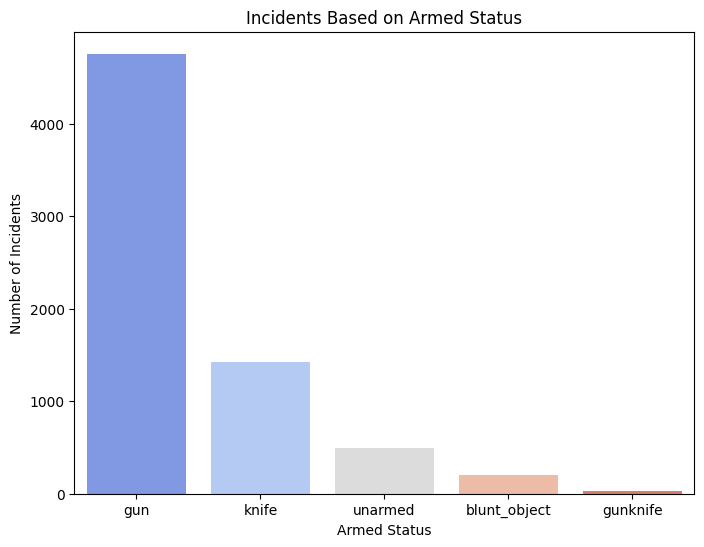

In [117]:

armed_count = df['armed'].value_counts()
armed_statuses = ['gun','knife', 'unarmed','blunt_object', 'gunknife']
# Reindex armed_count to include all possible categories, even those with zero count
armed_count = armed_count.reindex(armed_statuses, fill_value=0)

plt.figure(figsize=(8, 6))
sns.barplot(x=armed_count.index, y=armed_count.values, palette='coolwarm')

plt.title('Incidents Based on Armed Status')
plt.xlabel('Armed Status')
plt.ylabel('Number of Incidents')
plt.show()

1.What is the relationship between race and the likelihood of being shot by police?

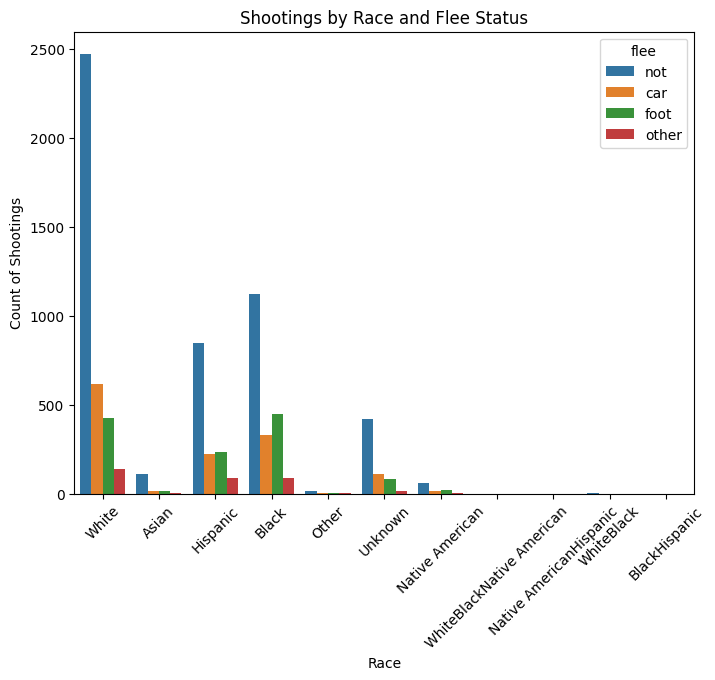

In [118]:
plt.figure(figsize=(8, 6))
sns.countplot(x='race', data=df, hue='flee')
plt.title('Shootings by Race and Flee Status')
plt.xlabel('Race')
plt.ylabel('Count of Shootings')
plt.xticks(rotation=45)
plt.show()


2. How does age or gender impact the likelihood of a fatal police encounter?

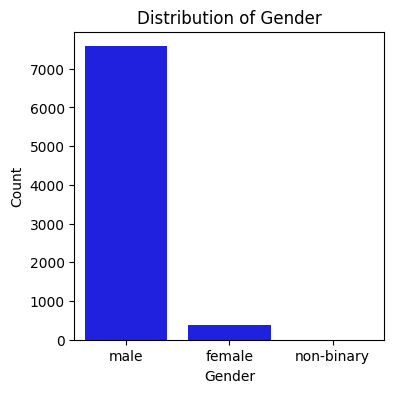

In [119]:
plt.figure(figsize=(4, 4))
sns.countplot(x='gender', data=df, color='blue')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


Fleeing during a police encounter can sometimes escalate the situation, and fleeing individuals are more likely to be involved in a police shooting.  If someone was attempting to run away from the police, it could be a contributing factor to the use of deadly force. If a certain race has a higher proportion of individuals fleeing during encounters, it may explain why they are more likely to be shot.

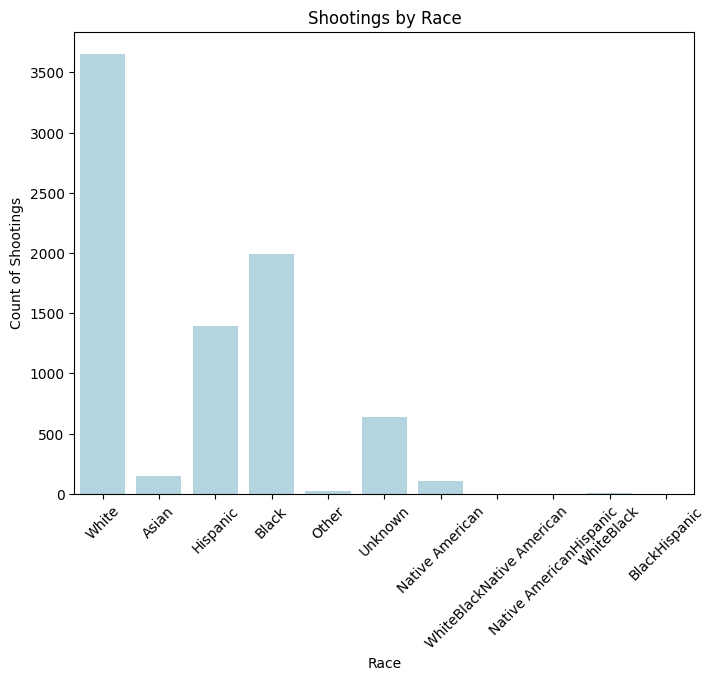

In [120]:
#shootings by race
plt.figure(figsize=(8, 6))
sns.countplot(x='race', data=df, color='lightblue')
plt.title('Shootings by Race')
plt.xlabel('Race')
plt.ylabel('Count of Shootings')
plt.xticks(rotation=45)
plt.show()


3.What role does mental illness play in these incidents?3.

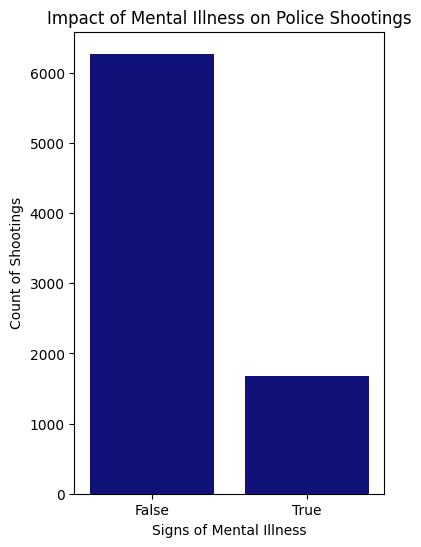

In [121]:
#mental illness and shootings
plt.figure(figsize=(4, 6))
sns.countplot(x='signs_of_mental_illness', data=df, color = 'darkblue')
plt.title('Impact of Mental Illness on Police Shootings')
plt.xlabel('Signs of Mental Illness')
plt.ylabel('Count of Shootings')
plt.show()


 4. Does the presence of body cameras affect the outcome of police encounters?

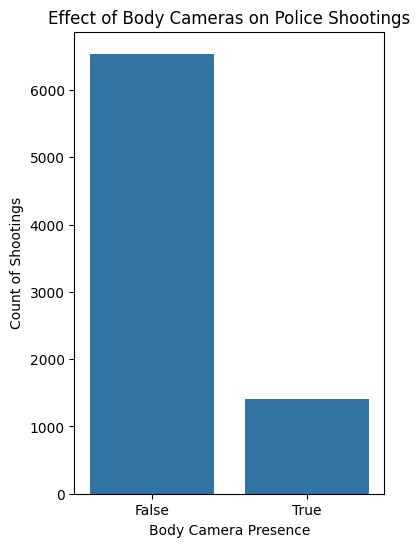

In [135]:
#compare shootings by body camera presence (ignoring flee status)
plt.figure(figsize=(4, 6))
sns.countplot(x='body_camera', data=df)
plt.title('Effect of Body Cameras on Police Shootings')
plt.xlabel('Body Camera Presence')
plt.ylabel('Count of Shootings')
plt.show()


Bootstrapping the Median age:
First, we sample the dataset with replacement to create bootstrap samples.
For each bootstrap sample, we calculate the median.
Then we repeat the resampling process 1000 times.

We can use the distribution of medians from the bootstrap samples to estimate the confidence interval for the median.

Determine 10% of the total rows and randomly sample 10% of the data.

In [123]:
#10% of the total number of rows in the dataset
sample_size = int(0.1 * len(df))

# Randomly sample 10% of the rows from the dataset
sampled_df = df.sample(n=sample_size, random_state=42)

#sampled data
print(sampled_df.head())


           date                     name   age gender    armed      race  \
3712 2018-10-04              William Cox  45.0   male      gun   Unknown   
9449 2024-03-10  Justin Michael Strawser  39.0   male      gun     White   
4288 2019-05-17            Daniel Warren  36.0   male      gun     Black   
7936 2022-11-10             Jesus Crosby  41.0   male    knife  Hispanic   
4176 2019-03-30        Andrew John Mason  22.0   male  unarmed     White   

                city state  flee  body_camera  signs_of_mental_illness  \
3712          Scarbo    WV   not        False                    False   
9449     Mooresville    NC   not        False                    False   
4288        Pasadena    CA   not         True                    False   
7936     Albuquerque    NM  foot        False                    False   
4176  Watauga County    NC   not        False                    False   

             police_departments_involved  year          city_state  
3712       West Virginia Stat

1. Randomly sample 10% of the data
2. Extract the quantitative variable of age
3. Bootstrapping simulation
4. Calculating the confidence interval

In [136]:
# Step 1: Randomly sample 10% of the data
sample_size = int(0.1 * len(df))
sample_df = df.sample(n=sample_size, random_state=42)

age_sample = sample_df['age'].dropna()


bootstrap_medians = []
n_iterations = 10000

for _ in range(n_iterations):
    resample = np.random.choice(age_sample, size=len(age_sample), replace=True)
    bootstrap_medians.append(np.median(resample))

lower = np.percentile(bootstrap_medians, 2.5)
upper = np.percentile(bootstrap_medians, 97.5)
median_est = np.mean(bootstrap_medians)

print(f"Estimated Median: {median_est}")
print(f"95% Confidence Interval: ({lower}, {upper})")


Estimated Median: 35.1986
95% Confidence Interval: (34.0, 36.0)


We are 95% confident that the true median age of people shot and killed by police lies between 34.0 and 36.0 years old.

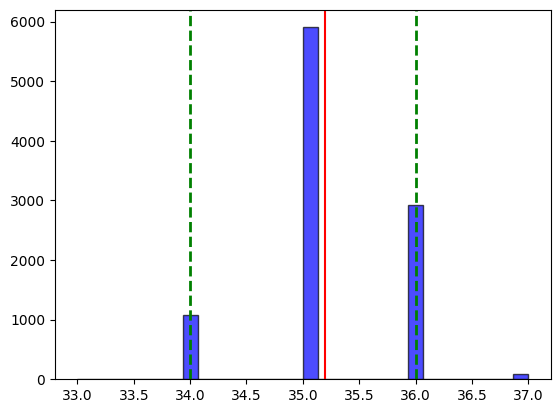

In [140]:
plt.hist(bootstrap_medians, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.axvline(median_est, color='red')
plt.axvline(lower, color='green', linestyle='dashed', linewidth=2)
plt.axvline(upper, color='green', linestyle='dashed', linewidth=2)
plt.show()

95% Confidence Interval: (34.0, 36.0): This range represents the interval within which the true population median is likely to fall with 95% confidence. In other words:

The lower bound (34.0) means that there's a 2.5% chance the true median is below this value.

The upper bound (36.0) means that there's a 2.5% chance the true median is above this value.

The range between 34.0 and 36.0 suggests that you can be 95% confident that the true median of the population lies within this range based on your sample.